In [2]:
import pandas as pd 
uri= 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [4]:
a_renomar = {
    'expected_hours' : 'horas_esperadas',
    'price': 'preco',
    'unfinished' : 'nao_finalizado'
}
dados = dados.rename(columns = a_renomar)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [5]:
trocar = {
    0:1,
    1:0
}

dados['finalizado'] = dados.nao_finalizado.map(trocar)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

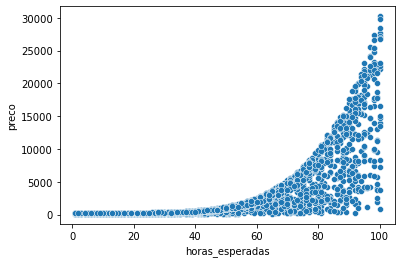

In [6]:
import seaborn as sns

sns.scatterplot(x = 'horas_esperadas', y = 'preco',
               data = dados)

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

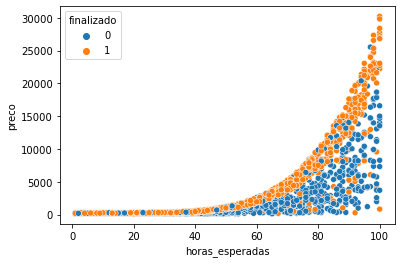

In [7]:
sns.scatterplot(x = 'horas_esperadas', y = 'preco', hue = 'finalizado',
               data = dados)

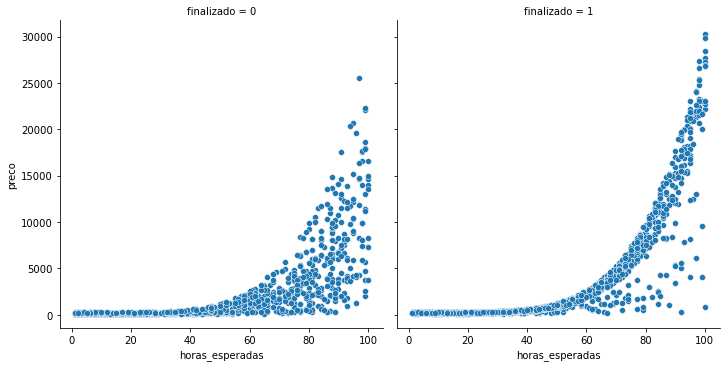

In [8]:
sns.relplot(x = 'horas_esperadas', y = 'preco', col = 'finalizado',
               data = dados)

In [9]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter("ignore")

SEED = 30
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(
                                            x, y,
                                            test_size = 0.25,
                                            stratify = y)

model = LinearSVC()
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print('Acuracia é %.2f%%' % acuracia)

Acuracia é 47.41%


In [55]:
import numpy as np
previsoes_f = np.ones(540)

In [56]:
acuracia = accuracy_score(teste_y, previsoes_f) * 100
print('Acuracia é %.2f%%' % acuracia)

Acuracia é 52.59%


<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

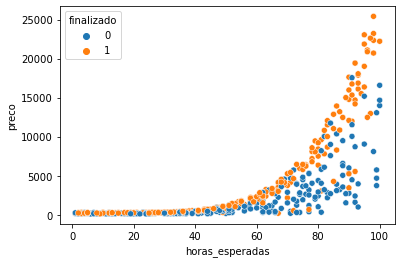

In [57]:
sns.scatterplot(x = 'horas_esperadas', y = 'preco', hue = teste_y,
               data = teste_x)

In [66]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

In [67]:
pixel = 100
eixo_x = np.arange(x_min, x_max , (x_max - x_min)/pixel)
eixo_y = np.arange(y_min, y_max , (y_max - y_min)/pixel)

In [70]:
xx, yy = np.meshgrid(eixo_x,  eixo_y)

pontos = np.c_[xx.ravel(), yy.ravel()]

In [73]:
Z = model.predict(pontos)
Z = Z.reshape(xx.shape)

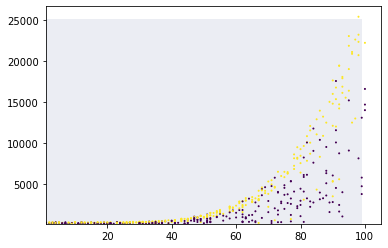

In [78]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha =0.1)

plt.scatter(teste_x.horas_esperadas,
           teste_x.preco,
           c = teste_y,
           s = 1)

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter("ignore")

SEED = 30
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(
                                            x, y,
                                            test_size = 0.25,
                                            stratify = y)

model = SVC()
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print('Acuracia é %.2f%%' % acuracia)

Acuracia é 55.37%


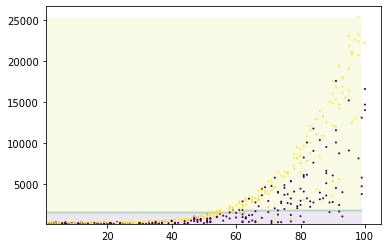

In [87]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

pixel = 100
eixo_x = np.arange(x_min, x_max , (x_max - x_min)/pixel)
eixo_y = np.arange(y_min, y_max , (y_max - y_min)/pixel)

xx, yy = np.meshgrid(eixo_x,  eixo_y)

pontos = np.c_[xx.ravel(), yy.ravel()]

Z = model.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha =0.1)

plt.scatter(teste_x.horas_esperadas,
           teste_x.preco,
           c = teste_y,
           s = 1)

In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import warnings
warnings.simplefilter("ignore")

SEED = 30
np.random.seed(SEED)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(
                                            x, y,
                                            test_size = 0.25,
                                            stratify = y)


scaler = StandardScaler()
scaler.fit(treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

model = SVC()
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print('Acuracia é %.2f%%' % acuracia)

Acuracia é 68.52%


In [89]:
data_x = teste_x[:, 0]
data_y = teste_x[:, 1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixel = 100
eixo_x = np.arange(x_min, x_max , (x_max - x_min)/pixel)
eixo_y = np.arange(y_min, y_max , (y_max - y_min)/pixel)

xx, yy = np.meshgrid(eixo_x,  eixo_y)

pontos = np.c_[xx.ravel(), yy.ravel()]

Z = model.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha =0.1)

plt.scatter(teste_x.horas_esperadas,
           teste_x.preco,
           c = teste_y,
           s = 1)

AttributeError: 'numpy.ndarray' object has no attribute 'horas_esperadas'